# Módulo 9: Visualización de Datos con Python: Parte 1
Utilizando matplotlig

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

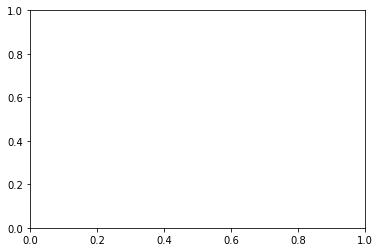

In [23]:
fig, ax = plt.subplots()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

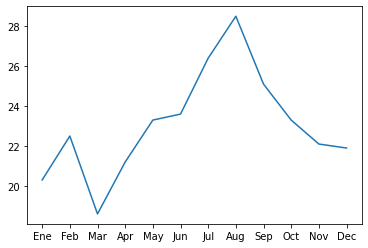

In [24]:
# Adición de datos al eje x (meses)
meses = pd.DataFrame(np.array(['Ene', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']), columns=['Meses'])

# Adición de datos al eje y (temperaturas promedio de cada mes en grados centígrados)
temp = pd.DataFrame(np.array([20.3, 22.5, 18.6, 21.2, 23.3, 23.6, 26.4, 28.5, 25.1, 23.3, 22.1, 21.9]), columns=['Temperaturas'])

fig, ax = plt.subplots()
ax.plot(meses['Meses'], temp['Temperaturas'])
plt.show

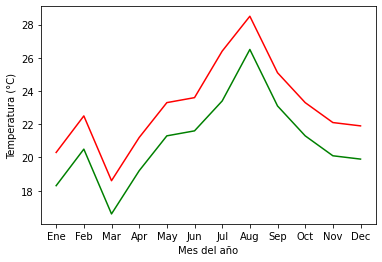

In [25]:
# Creación de df para temperaturas promedio por mes en grados centigrados en la ciudad 2

temp2 = pd.DataFrame(np.array([18.3, 20.5, 16.6, 19.2, 21.3, 21.6, 23.4, 26.5, 23.1, 21.3, 20.1, 19.9]), columns=['Temperaturas'])

fig, ax = plt.subplots()
ax.plot(meses['Meses'], temp['Temperaturas'], color='r')
ax.plot(meses['Meses'], temp2['Temperaturas'], color='g')

# Personalizar título de los ejes
ax.set_xlabel('Mes del año')
ax.set_ylabel('Temperatura (°C)')

plt.show()

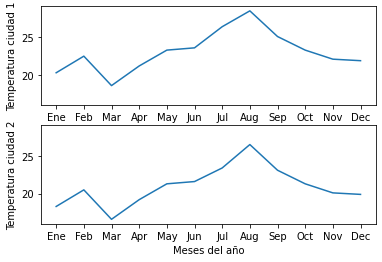

In [26]:
# Crear dos gráficos dentro de una sola figura

fig, ax = plt.subplots(2,1, sharey=True)         # Dos renglones, una columna, Sharey es para que los gráficos compartan la misma escala en y, esto permite compararlos
ax[0].plot(meses['Meses'], temp['Temperaturas'])
ax[1].plot(meses['Meses'], temp2['Temperaturas'])

ax[1].set_xlabel('Meses del año')
ax[0].set_ylabel('Temperatura ciudad 1')
ax[1].set_ylabel('Temperatura ciudad 2')

plt.show()


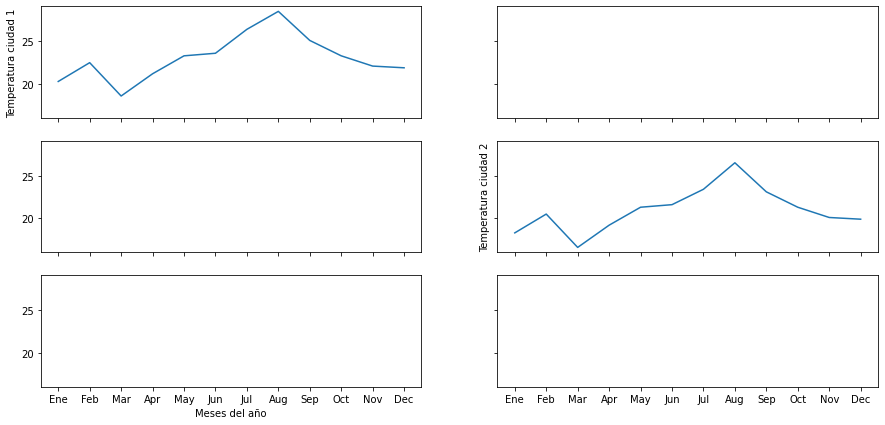

In [27]:
# Subplots con más de un renglón y más de una columna

fig, ax = plt.subplots(3,2, sharey=True, sharex=True, figsize=(15,7))         # Dos renglones, una columna, Sharey es para que los gráficos compartan la misma escala en y, esto permite compararlos
ax[0,0].plot(meses['Meses'], temp['Temperaturas'])
ax[1,1].plot(meses['Meses'], temp2['Temperaturas'])

ax[2,0].set_xlabel('Meses del año')
ax[0,0].set_ylabel('Temperatura ciudad 1')
ax[1,1].set_ylabel('Temperatura ciudad 2')

plt.show()

## Funciones de series de tiempo


In [28]:
df = pd.read_csv('co2-mm-mlo_csv.csv')
df

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1
...,...,...,...,...,...,...
722,2018-05-01,2018.375,411.24,411.24,407.91,24
723,2018-06-01,2018.458,410.79,410.79,408.49,29
724,2018-07-01,2018.542,408.71,408.71,408.32,27
725,2018-08-01,2018.625,406.99,406.99,408.90,30


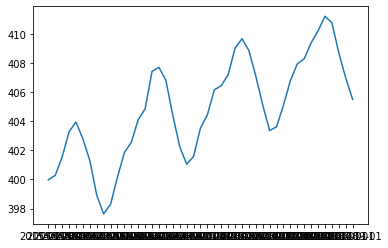

In [29]:
fechas = df[df['Date'] >= "2015-01-01"]
plt.plot(fechas['Date'], fechas['Interpolated'])
plt.show()
# Nota como las fechas salen encimadas

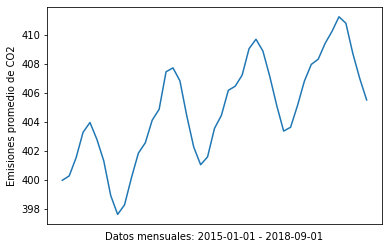

In [30]:
fig, ax = plt.subplots()
ax.plot(fechas['Date'], fechas['Interpolated'])
ax.axes.xaxis.set_ticks([])     # Se entrega una lista vacía que sería lo que entraría como ticks, como está vacía, simplemente se borran las ticks del eje x
plt.xlabel('Datos mensuales: 2015-01-01 - 2018-09-01')
plt.ylabel('Emisiones promedio de CO2')
plt.show()

In [31]:
# Función que grafica series de tiempo
def grafica_series_de_tiempo(ejes, x, y, color, etiqueta_x, etiqueta_y):
    ejes.plot(x, y, color=color)
    ejes.set_xlabel(etiqueta_x)
    ejes.set_ylabel(etiqueta_y, color=color)
    ejes.tick_params('y', colors = color)


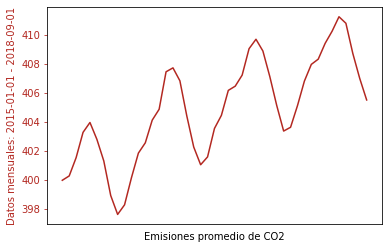

In [32]:
fig, ax = plt.subplots()
grafica_series_de_tiempo(ax, fechas['Date'], fechas['Interpolated'], '#B32821', 'Emisiones promedio de CO2', 'Datos mensuales: 2015-01-01 - 2018-09-01')
ax.axes.xaxis.set_ticks([])
plt.show()

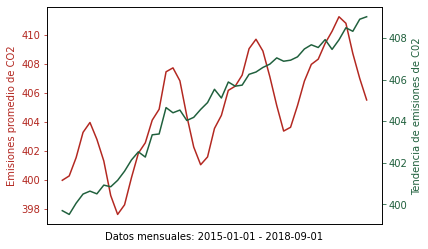

In [33]:
# Agregar una segunda serie
fig, ax = plt.subplots()
grafica_series_de_tiempo(ax, fechas['Date'], fechas['Interpolated'], '#B32821', 'Datos mensuales: 2015-01-01 - 2018-09-01', 'Emisiones promedio de CO2')

ax2 = ax.twinx()
grafica_series_de_tiempo(ax2, fechas['Date'], fechas['Trend'], '#20603D', 'Datos mensuales: 2015-01-01 - 2018-09-01','Tendencia de emisiones de C02')

ax.axes.xaxis.set_ticks([])
plt.show()

## Visualizaciones cuantitativas y estadísticas

In [34]:
df = pd.read_csv('olympic-medals.csv',index_col=0)
df

,Gold,Silver,Bronze
TEAM,,,
United States of America,39,41,33
People's Republic of China,38,32,18
Japan,27,14,17
Great Britain,22,21,22
ROC,20,28,23
...,...,...,...
Ghana,0,0,1
Grenada,0,0,1
Kuwait,0,0,1


In [35]:
medallas = df.head(10)
medallas

,Gold,Silver,Bronze
TEAM,,,
United States of America,39,41,33
People's Republic of China,38,32,18
Japan,27,14,17
Great Britain,22,21,22
ROC,20,28,23
Australia,17,7,22
Netherlands,10,12,14
France,10,12,11
Germany,10,11,16


C:\Users\CARLOS DEL VALLE\AppData\Local\Temp\ipykernel_15644\2133218661.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medallas.index, rotation=90)


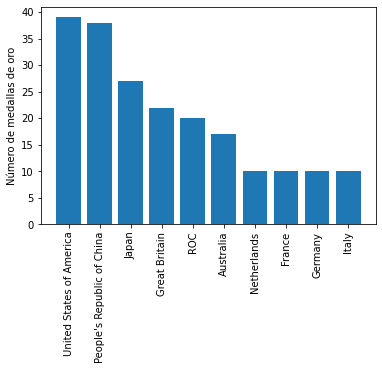

In [36]:
# Gráfico de barras

fig, ax = plt.subplots()
ax.bar(medallas.index, medallas['Gold'])
ax.set_xticklabels(medallas.index, rotation=90)
ax.set_ylabel('Número de medallas de oro')
plt.show()

C:\Users\CARLOS DEL VALLE\AppData\Local\Temp\ipykernel_15644\2025250202.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medallas.index, rotation=90)


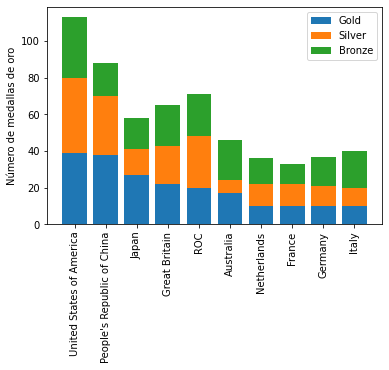

In [37]:
# barras apiladas
fig, ax = plt.subplots()
ax.bar(medallas.index, medallas['Gold'])

# Aqui se apila la segunda y tercer serie
ax.bar(medallas.index, medallas['Silver'], bottom=medallas['Gold'])
ax.bar(medallas.index, medallas['Bronze'], bottom=medallas['Gold'] + medallas['Silver'])

# Agregar leyenda
ax.legend(['Gold', 'Silver', 'Bronze'])

ax.set_xticklabels(medallas.index, rotation=90)
ax.set_ylabel('Número de medallas de oro')
plt.show()

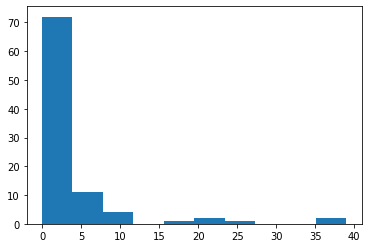

In [38]:
#Histograma

fig, ax = plt.subplots()
ax.hist(df['Gold'])
plt.show()

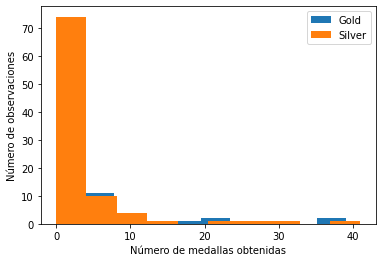

In [39]:
# Dos histogramas sobrepuestos
fig, ax  = plt.subplots()

# Aqui las leyendas se están agregando directamente en la serie y solamente se pone ax.legend() para activar la caja de leyendas
ax.hist(df['Gold'], label='Gold')
ax.hist(df['Silver'], label='Silver')

ax.set_xlabel('Número de medallas obtenidas')
ax.set_ylabel('Número de observaciones')

ax.legend()

plt.show()

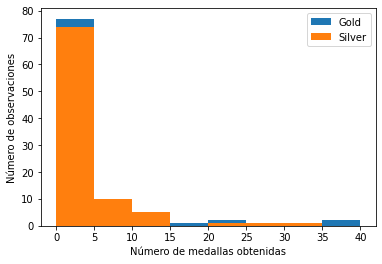

In [40]:
# Cambiar los ticks de los histogramas con la propiedad bins a partir del codigo de la celda anterior
fig, ax  = plt.subplots()


ax.hist(df['Gold'], label='Gold', bins= [0,5,10,15,20,25,30,35,40])         # Aqui se agrega una lista manual
ax.hist(df['Silver'], label='Silver', bins= list(range(0,40,5)))            # Aqui es una lista generada a partir de una función range

ax.set_xlabel('Número de medallas obtenidas')
ax.set_ylabel('Número de observaciones')

ax.legend()

plt.show()

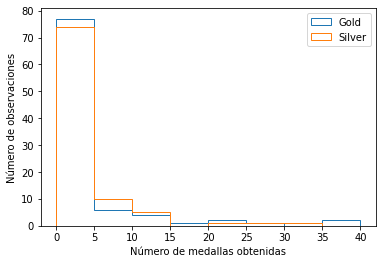

In [41]:
# Histogramas transparentes para que no tapen completamtent al del fondo con la propiedad histtype='step'
fig, ax  = plt.subplots()


ax.hist(df['Gold'], label='Gold', bins= [0,5,10,15,20,25,30,35,40], histtype='step')
ax.hist(df['Silver'], label='Silver', bins= list(range(0,40,5)), histtype='step')

ax.set_xlabel('Número de medallas obtenidas')
ax.set_ylabel('Número de observaciones')

ax.legend()

plt.show()

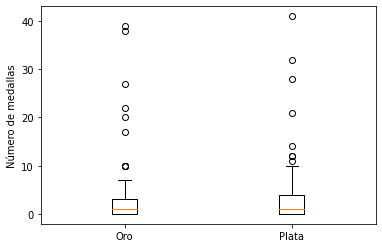

In [42]:
# Diagrama de caja

fig, ax = plt.subplots()
ax.boxplot([df['Gold'], df['Silver']])
ax.set_xticklabels(['Oro', 'Plata'])
ax.set_ylabel('Número de medallas')
plt.show()

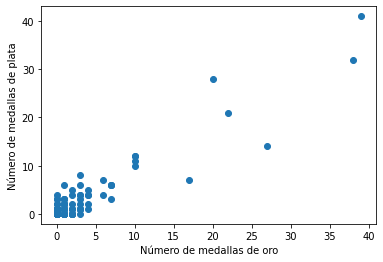

In [43]:
# Gráfico de dispersión para encontrar correlación

fig, ax = plt.subplots()
ax.scatter(df['Gold'], df['Silver'])
ax.set_xlabel('Número de medallas de oro')
ax.set_ylabel('Número de medallas de plata')
plt.show()

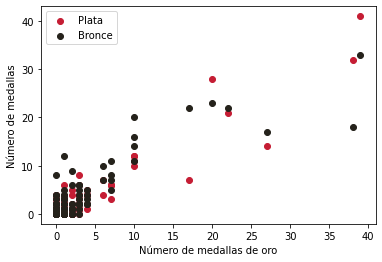

In [46]:
# Creación de gráficos de dispersión múltiples

fig, ax = plt.subplots()

ax.scatter(df['Gold'], df['Silver'], color='#C51D34' , label= 'Plata')
ax.scatter(df['Gold'], df['Bronze'], color='#25221B' , label= 'Bronce')

ax.set_xlabel('Número de medallas de oro')
ax.set_ylabel('Número de medallas')
ax.legend()

plt.show()

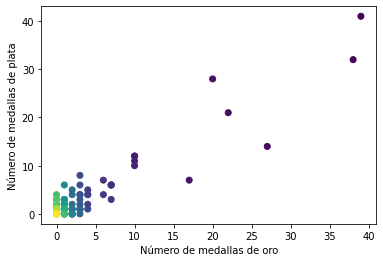

In [47]:
# Gráfico de dispesión que cambia el color dependiendo del índice

df = pd.read_csv('olympic-medals.csv')

fig, ax = plt.subplots()

ax.scatter(df['Gold'], df['Silver'], c= df.index)
ax.set_ylabel('Número de medallas de plata')
ax.set_xlabel('Número de medallas de oro')
plt.show()

## Compartición de visualizaciones

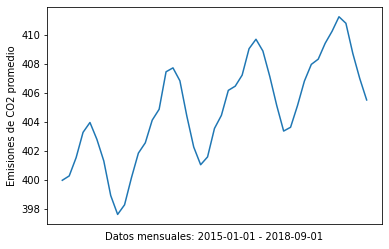

In [49]:
df = pd.read_csv('co2-mm-mlo_csv.csv')
fechas = df[df['Date'] >= '2015-01-01']

fig, ax = plt.subplots()
ax.plot(fechas['Date'], fechas['Interpolated'])
ax.axes.xaxis.set_ticks([])
plt.xlabel('Datos mensuales: 2015-01-01 - 2018-09-01')
plt.ylabel('Emisiones de CO2 promedio')
plt.show()

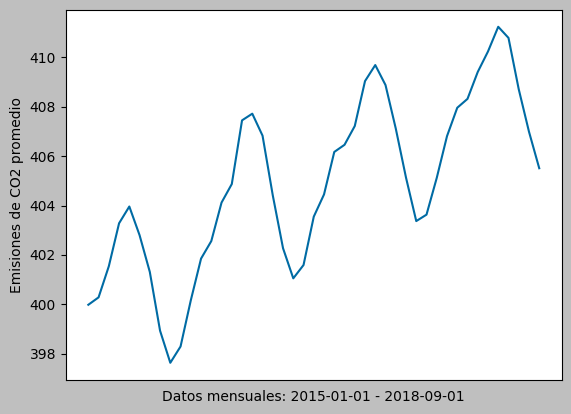

In [62]:
plt.style.use('tableau-colorblind10') # Con esta instruccion se cambia el estilo que se usa para los gráficos, usar "default" para regresar al estilo original

fig, ax = plt.subplots()
ax.plot(fechas['Date'], fechas['Interpolated'])
ax.axes.xaxis.set_ticks([])
plt.xlabel('Datos mensuales: 2015-01-01 - 2018-09-01')
plt.ylabel('Emisiones de CO2bpromedio')
plt.show()

In [64]:
# Exportar imagen
# Para exportar eol gráfico sobre el cual estamos trabajando

fig.savefig('emisiones.png')

In [65]:
ls

 El volumen de la unidad D es ARCHIVOS
 El n�mero de serie del volumen es: 4E91-0C0E

 Directorio de d:\Documentos\DataAnalysis\EBAC\Python\Modulo9

15/10/2022  07:37 p. m.    <DIR>          .
15/10/2022  07:37 p. m.    <DIR>          ..
14/10/2022  11:29 p. m.            32,773 co2-mm-mlo_csv.csv
15/10/2022  07:39 p. m.            34,534 emisiones.png
15/10/2022  07:39 p. m.           436,554 Modulo9_VisualizacionParte1.ipynb
15/10/2022  11:00 a. m.             1,633 olympic-medals.csv
               4 archivos        505,494 bytes
               2 dirs  512,354,680,832 bytes libres


In [67]:
# Cambiar resolución

fig.savefig('emisiones.pdf', dpi=100)

# Se puede cambiar tambien la extension del archivo por otros formatos de imagen o pdf